In [5]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Criando uma função para mostrar uma linha

def linha():
    print('\033[34m', end = '')
    print('-' * 60, '\033[m')

In [6]:
# Configurando o tamanho padrão dos gráficos

plt.rcParams['figure.figsize'] = (11,7)

In [67]:
# Carregando os dados necessarios

tabela = 'STG_OPR_ITT.xlsx'
dados_STG_OPR_ITT = pd.read_excel(tabela)

In [22]:
nome_colunas = dados_STG_OPR_ITT.columns

linhas = dados_STG_OPR_ITT.shape[0]
colunas = dados_STG_OPR_ITT.shape[1]

In [23]:
linha()

print(f'A tabela {tabela} tem {linhas} linhas e {colunas} colunas.')

linha()

print('Contendo as colunas: ')
for indice, coluna in enumerate(nome_colunas): 
    print(f'{indice} - {coluna}')
    
linha()

------------------------------------------------------------ 
A tabela STG_OPR_ITT.xlsx tem 891 linhas e 11 colunas.
------------------------------------------------------------ 
Contendo as colunas: 
0 - ID_STG_OPR_ITT
1 - VLR_CTRD_CSC
2 - QTD_PCL
3 - VLR_SDO_DDR
4 - QTD_CLI_CAD_POS
5 - QTD_OPR
6 - ID_FNT_ITT
7 - ID_MDL
8 - DES_TIP_PSS
9 - DAT_RSS_FNT_ITT
10 - DAT_INC_DBO
------------------------------------------------------------ 


In [71]:
# Número de operações por modalidades 

dados_temp = dados_STG_OPR_ITT['ID_MDL'].dropna()

opr_por_mdl = dados_temp.value_counts(ascending = False)
opr_por_mdl

B03    214
C01    186
A01    122
A04    112
B99    104
B05     71
A99     35
A05     20
B01     19
B06      4
B07      2
F01      1
G01      1
Name: ID_MDL, dtype: int64

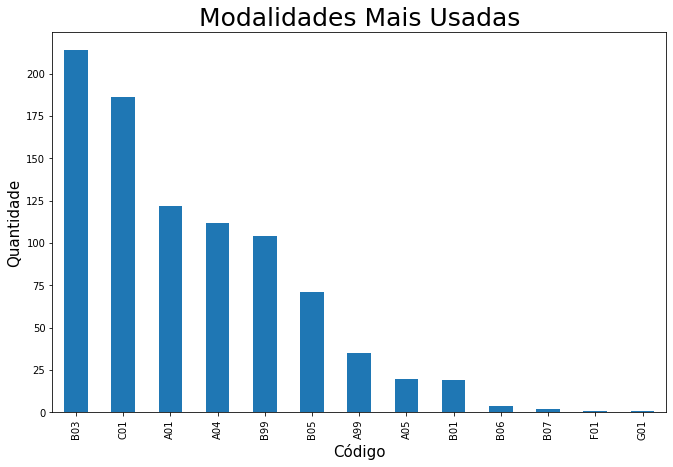

In [72]:
# Criando um grafico para ficar mais visivel

opr_por_mdl.plot.bar();

plt.title("Modalidades Mais Usadas", size=25); # Adicionando um título
plt.xlabel('Código', size=15); # Nomeando o eixo X
plt.ylabel('Quantidade', size=15); # Nomeando o eixo Y

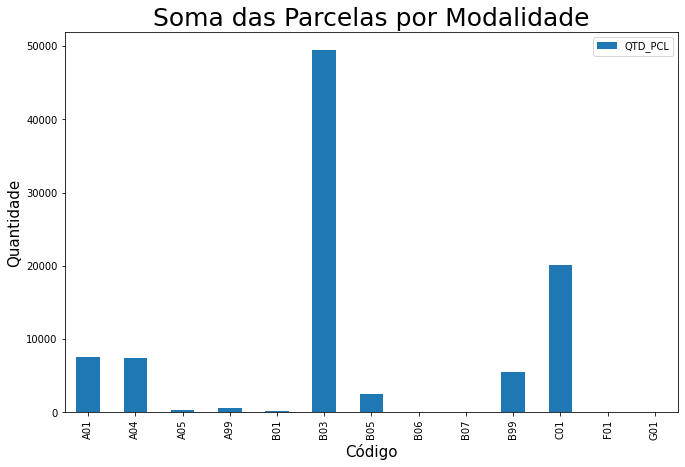

In [76]:
temp = dados_STG_OPR_ITT[['ID_MDL', 'QTD_PCL']].dropna()

dados_temp = temp.groupby(['ID_MDL']).sum()

dados_temp.plot.bar();

plt.title("Soma das Parcelas por Modalidade", size=25); # Adicionando um título
plt.xlabel('Código', size=15); # Nomeando o eixo X
plt.ylabel('Quantidade', size=15); # Nomeando o eixo Y

In [55]:
dados_STG_OPR_ITT[['ID_MDL', 'QTD_PCL']].groupby(['ID_MDL']).count()

,QTD_PCL
ID_MDL,
A01,122
A04,112
A05,20
A99,35
B01,19
B03,214
B05,71
B06,4
B07,2


In [57]:
dados_STG_OPR_ITT[['ID_MDL', 'QTD_PCL']].groupby(['ID_MDL']).max()

,QTD_PCL
ID_MDL,
A01,142
A04,240
A05,25
A99,35
B01,22
B03,360
B05,84
B06,48
B07,60


In [61]:
dados_STG_OPR_ITT[['ID_MDL', 'QTD_PCL']].groupby(['ID_MDL']).min()

,QTD_PCL
ID_MDL,
A01,1
A04,1
A05,4
A99,1
B01,3
B03,24
B05,1
B06,12
B07,48


In [59]:
dados_STG_OPR_ITT[['ID_MDL', 'QTD_PCL']].groupby(['ID_MDL']).describe()

QTD_PCL                                                           
         count        mean        std   min     25%    50%     75%    max
ID_MDL                                                                   
A01      122.0   61.991803  36.213211   1.0   31.25   61.5   91.75  142.0
A04      112.0   66.491071  50.178240   1.0   28.75   56.5   88.50  240.0
A05       20.0   14.350000   6.611593   4.0    8.75   14.5   19.25   25.0
A99       35.0   18.000000  10.246951   1.0    9.50   18.0   26.50   35.0
B01       19.0   12.105263   5.801290   3.0    7.50   12.0   16.50   22.0
B03      214.0  231.154206  84.783677  24.0  171.25  238.5  302.75  360.0
B05       71.0   36.380282  21.307521   1.0   18.50   36.0   53.50   84.0
B06        4.0   25.000000  16.124515  12.0   15.00   20.0   30.00   48.0
B07        2.0   54.000000   8.485281  48.0   51.00   54.0   57.00   60.0
B99      104.0   53.096154  31.240849   1.0   26.75   52.5   78.25  120.0
C01      186.0  108.274194  55.602013  11.0   61.25  107.5  154.75  300.0
F01        1.0    2.000000        NaN   2.0    2.00    2.0    2.00    2.0
G01        1.0    1.000000        NaN   1.0    1.00    1.0    1.00    1.0